In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
#from sklearn.neighbors import KNeigbhorClassifier
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, precision_score

In [3]:
data=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
q=['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
   'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
   'fractal_dimension_worst']
data=data.drop(q, axis=1)

In [7]:
data.isna().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
Unnamed: 32               569
dtype: int64

In [8]:
data=data.drop(['Unnamed: 32', 'id'], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['diagnosis']=label.fit_transform(data["diagnosis"])

In [10]:
data['diagnosis'].unique()

array([1, 0])

In [11]:

print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [12]:
y=data.diagnosis.values
#x_data=data.drop(['id'], axis=0)
x_data=data.drop(['diagnosis'], axis=1)
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


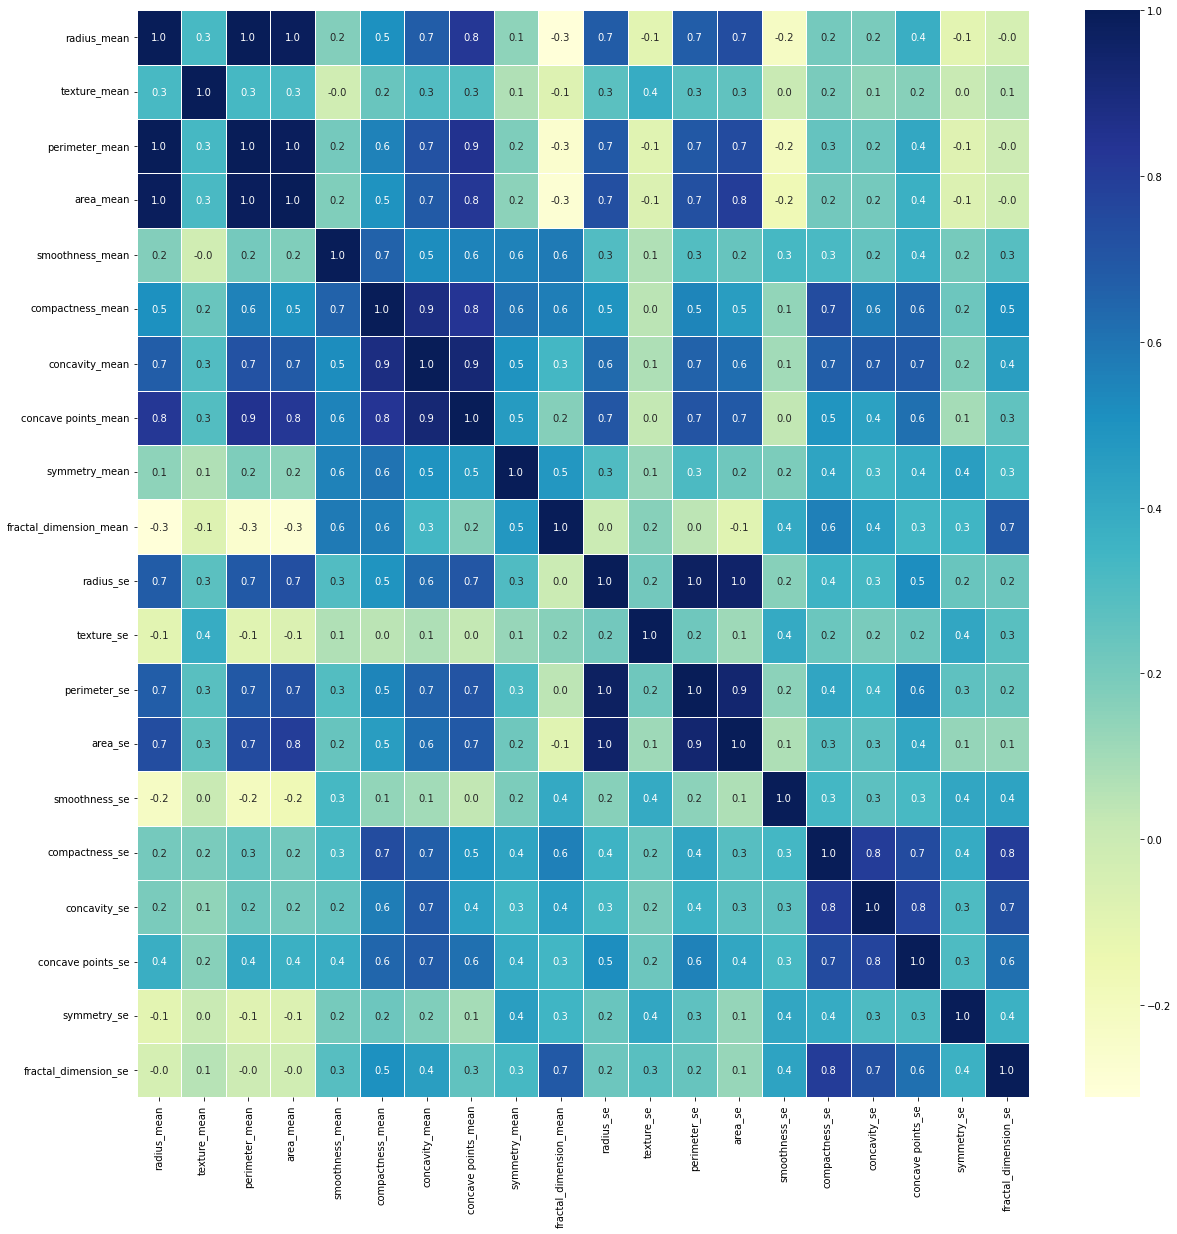

In [13]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x_data.corr(), cmap="YlGnBu",annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig("heat_map")

In [14]:
#radius = data[['radius_mean','radius_se','radius_worst','diagnosis']]
#sns.pairplot(radius, hue='diagnosis')
#plt.savefig("radius")

In [15]:
plt.figure()
data["diagnosis"].plot

<Figure size 432x288 with 0 Axes>

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.20, shuffle=True)

In [17]:
model0=LinearRegression()
model0.fit(x_train, y_train)
y_pred=model0.predict(x_test)
print("Linear regression Train Accuracy : {} %".format(model0.score(x_train, y_train)*100))
rmse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error=", mae)
print("Root Mean Squared Error=", rmse)
accuracy_score=cross_val_score(model0, x_train, y_train, scoring='r2')
print(accuracy_score)
results=[]
names=[]
results.append(accuracy_score)
names.append('LinReg')


Linear regression Train Accuracy : 70.91341081601286 %
Mean Absolute Error= 0.2240344105223475
Root Mean Squared Error= 0.07737530638376704
[0.70762547 0.71592196 0.59983803 0.64823344 0.72756343]


In [18]:
#SDGClassifier
model2=SGDClassifier()
model2.fit(x_train, y_train)


SGDClassifier()

In [19]:
from sklearn.metrics import accuracy_score
y_pred=model2.predict(x_test)
conmat=confusion_matrix(y_test, y_pred)
acc=cross_val_score(model2, x_train, y_train, scoring='accuracy')
results.append(acc)
names.append('SDG')
print("SDG Train Accuracy : {} %".format(model2.score(x_train, y_train)*100))
print("SDG Test Accuracy : {} %".format(model2.score(x_test, y_test)*100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

#print("SDG regression Test Accuracy : {} %".format(acc*100))
#print("Mean Absolute Error=", MAE)
#print("Mean Squared Error=", MSE)
#print("Root Mean Squared Error=", RMSE)
#print("R2 score=", r2)
print("CONFUSION MATRIX")
print(conmat)

SDG Train Accuracy : 83.95604395604396 %
SDG Test Accuracy : 84.21052631578947 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.77      0.87      0.82        47

    accuracy                           0.84       114
   macro avg       0.84      0.85      0.84       114
weighted avg       0.85      0.84      0.84       114

CONFUSION MATRIX
[[55 12]
 [ 6 41]]


In [20]:
model3=SVC()
model3.fit(x_train, y_train)

SVC()

In [21]:
y_pred=model3.predict(x_test)
accuracy_score=model3.score(x_test, y_test)
#confusion_mat=model.confusion_matrix()
print("SVM Train Accuracy : {} %".format(model3.score(x_train, y_train)*100))
print("SVM Test Accuracy : {} %".format(accuracy_score*100))
#print("Classification report:")
print(classification_report(y_pred, y_test))
cv_results = cross_val_score(model3, x_train, y_train, scoring='accuracy')
results.append(cv_results)
names.append('SVM')
print(cv_results)
print(results)
print(names)

SVM Train Accuracy : 89.45054945054946 %
SVM Test Accuracy : 88.59649122807018 %
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        76
           1       0.77      0.95      0.85        38

    accuracy                           0.89       114
   macro avg       0.87      0.90      0.88       114
weighted avg       0.90      0.89      0.89       114

[0.89010989 0.89010989 0.91208791 0.82417582 0.94505495]
[array([0.70762547, 0.71592196, 0.59983803, 0.64823344, 0.72756343]), array([0.84615385, 0.89010989, 0.89010989, 0.81318681, 0.71428571]), array([0.89010989, 0.89010989, 0.91208791, 0.82417582, 0.94505495])]
['LinReg', 'SDG', 'SVM']


In [22]:
model5=DecisionTreeClassifier()
model5.fit(x_train, y_train)


DecisionTreeClassifier()

In [23]:
#y_pred=model5.predict(x_test, y_test)
print("Test Accuracy:", model5.score(x_test, y_test))
print("Train Accuracy:", model5.score(x_train, y_train))
print("classification report:")
print(classification_report(y_pred, y_test))
cv=cross_val_score(model5, x_train, y_train, scoring="accuracy")
names.append("Tree")
results.append(cv)
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9210526315789473
Train Accuracy: 1.0
classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        76
           1       0.77      0.95      0.85        38

    accuracy                           0.89       114
   macro avg       0.87      0.90      0.88       114
weighted avg       0.90      0.89      0.89       114

[[65  2]
 [11 36]]


In [24]:
model6=RandomForestClassifier()
model6.fit(x_train, y_train)
y_pred=model6.predict(x_test)
print("Train accuracy:", model6.score(x_train, y_train)*100)
print("Test accuracy:", model6.score(x_test, y_test)*100) 
print("classification report:")
print(classification_report(y_pred, y_test))
cv=cross_val_score(model6, x_train, y_train, scoring="accuracy")
results.append(cv)
names.append("RandFor")
print(confusion_matrix(y_test, y_pred))

Train accuracy: 100.0
Test accuracy: 96.49122807017544
classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[66  1]
 [ 3 44]]


In [25]:
mdl7=AdaBoostClassifier()
mdl7.fit(x_train, y_train)
y_pred=mdl7.predict(x_test)
print("Train Acc:", mdl7.score(x_train, y_train)*100)
print("Test Acc:", mdl7.score(x_test, y_test)*100)
print("classification report:")
print(classification_report(y_pred, y_test))
cv=cross_val_score(mdl7, x_train, y_train, scoring="accuracy")
results.append(cv)
names.append("AdaBoost")
print(confusion_matrix(y_test, y_pred))

Train Acc: 100.0
Test Acc: 93.85964912280701
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.91      0.93      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[64  3]
 [ 4 43]]


In [26]:
mdl8=GradientBoostingClassifier()
mdl8.fit(x_train, y_train)
y_pred=mdl8.predict(x_test)
print("Train Acc:", mdl8.score(x_train, y_train)*100)
print("Test Acc:", mdl8.score(x_test, y_test)*100)
print("classification report:")
print(classification_report(y_pred, y_test))
cv=cross_val_score(mdl8, x_train, y_train, scoring="accuracy")
results.append(cv)
names.append("GBoost")
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Train Acc: 100.0
Test Acc: 96.49122807017544
classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

confusion matrix:
[[65  2]
 [ 2 45]]


In [27]:
mdl9=GaussianNB()
mdl9.fit(x_train, y_train)
y_pred=mdl9.predict(x_test)
print("Train acc:", mdl9.score(x_train, y_train)*100)
print("Test acc:", mdl9.score(x_test, y_test)*100)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
cv=cross_val_score(mdl9, x_train, y_train, scoring="accuracy")
results.append(cv)
names.append("GNB")

Train acc: 91.64835164835165
Test acc: 91.22807017543859
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        73
           1       0.83      0.95      0.89        41

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

[[65  2]
 [ 8 39]]


In [28]:
mdl10=BernoulliNB() 
mdl10.fit(x_train, y_train) 
y_pred=mdl10.predict(x_test) 
print("Train acc:", mdl10.score(x_train, y_train)*100) 
print("Test acc:", mdl10.score(x_test, y_test)*100) 
print(classification_report(y_pred, y_test)) 
print(confusion_matrix(y_test, y_pred)) 
cv=cross_val_score(mdl10, x_train, y_train, scoring="accuracy") 
results.append(cv) 
names.append("BernoulliNB")

Train acc: 63.73626373626373
Test acc: 58.77192982456141
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       114
           1       0.00      0.00      0.00         0

    accuracy                           0.59       114
   macro avg       0.50      0.29      0.37       114
weighted avg       1.00      0.59      0.74       114

[[67  0]
 [47  0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
mdl11=ComplementNB() 
mdl11.fit(x_train, y_train) 
y_pred=mdl11.predict(x_test) 
print("Train acc:", mdl11.score(x_train, y_train)*100) 
print("Test acc:", mdl11.score(x_test, y_test)*100) 
print(classification_report(y_pred, y_test)) 
print(confusion_matrix(y_test, y_pred)) 
cv=cross_val_score(mdl11, x_train, y_train, scoring="accuracy") 
results.append(cv) 
names.append("ComplementNB")

Train acc: 87.25274725274726
Test acc: 86.8421052631579
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        78
           1       0.72      0.94      0.82        36

    accuracy                           0.87       114
   macro avg       0.85      0.89      0.86       114
weighted avg       0.89      0.87      0.87       114

[[65  2]
 [13 34]]


In [30]:
mdl12=MultinomialNB() 
mdl12.fit(x_train, y_train) 
y_pred=mdl11.predict(x_test) 
print("Train acc:", mdl12.score(x_train, y_train)*100) 
print("Test acc:", mdl12.score(x_test, y_test)*100) 
print(classification_report(y_pred, y_test)) 
print(confusion_matrix(y_test, y_pred)) 
cv=cross_val_score(mdl11, x_train, y_train, scoring="accuracy") 
results.append(cv) 
names.append("MultiNB")

Train acc: 87.03296703296704
Test acc: 86.8421052631579
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        78
           1       0.72      0.94      0.82        36

    accuracy                           0.87       114
   macro avg       0.85      0.89      0.86       114
weighted avg       0.89      0.87      0.87       114

[[65  2]
 [13 34]]


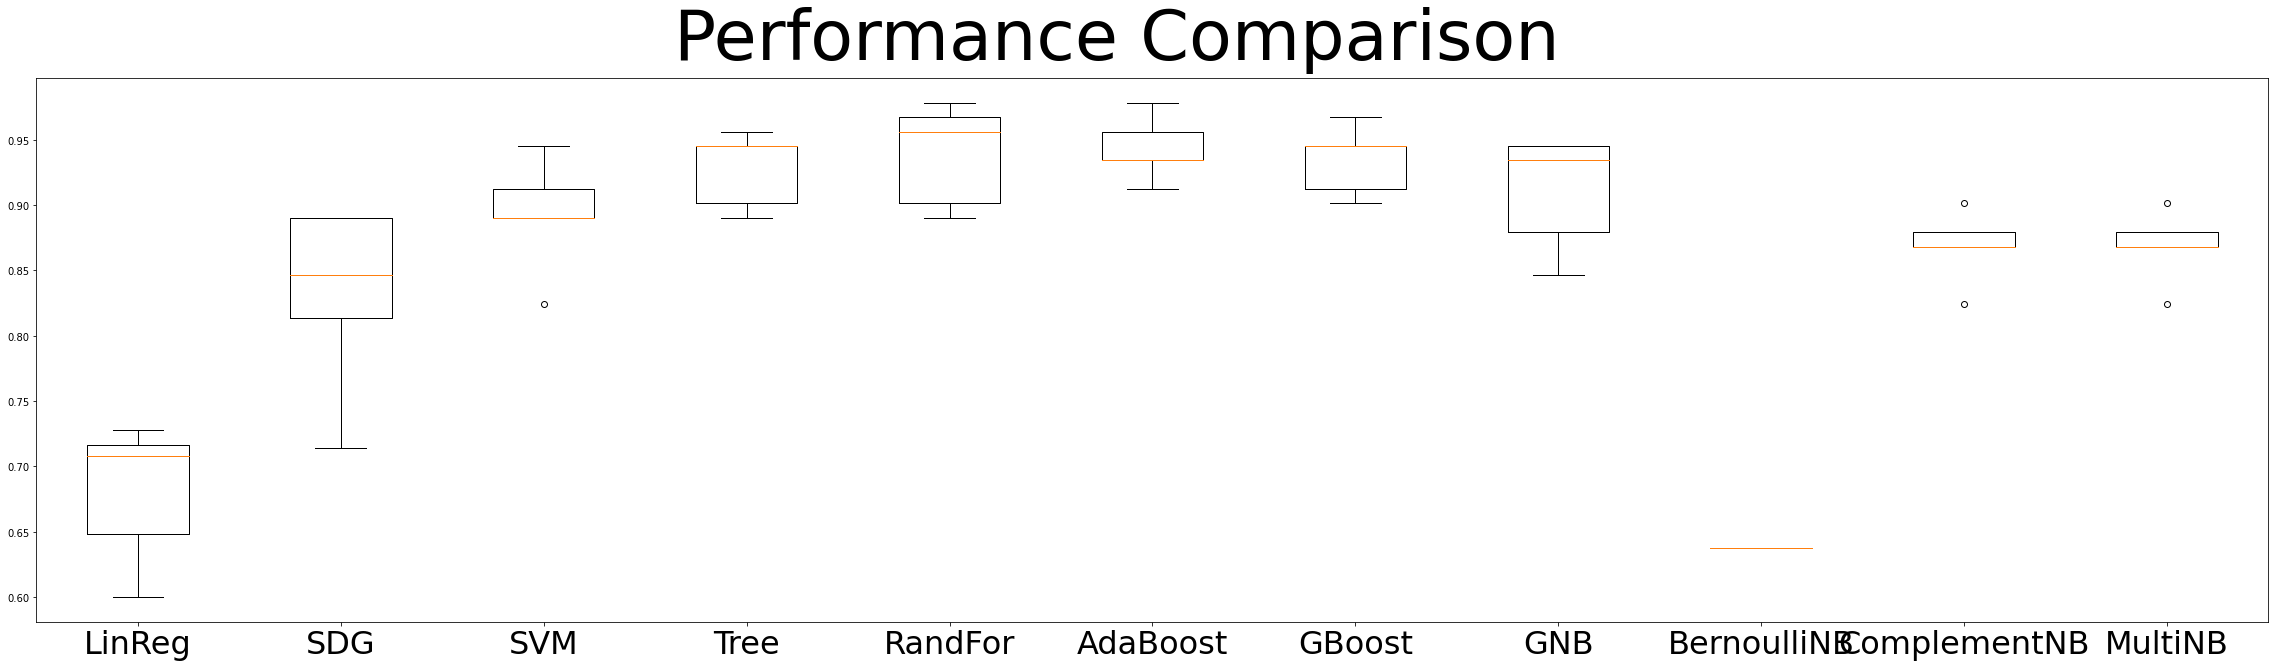

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(40,10))
fig.suptitle('Performance Comparison', fontsize=70)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=32)

plt.show()
plt.savefig("performance")
